In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Описание данных:  
### 10 раз из трех компаний на один и тот же адрес была заказана пицца и замерено время доставки.

### H0: $\mu1 = \mu2 = \mu3$, т.е. все пиццерии доставляют пиццу в одинаковое время.  
### H1: пиццерии доставляют пиццу в разное время.

In [2]:
A = [22, 22, 19, 21, 23, 22, 24, 20, 21, 24]
B = [20, 21, 19, 21, 19, 23, 21, 21, 18, 20]
C = [22, 25, 23, 22, 19, 20, 23, 24, 21, 22]

In [3]:
print('A =', A, '\nB =', B, '\nC =', C)

A = [22, 22, 19, 21, 23, 22, 24, 20, 21, 24] 
B = [20, 21, 19, 21, 19, 23, 21, 21, 18, 20] 
C = [22, 25, 23, 22, 19, 20, 23, 24, 21, 22]


In [4]:
all_scores = A + B + C
company_names = (['A'] * len(A)) +  (['B'] * len(B)) +  (['C'] * len(C))

In [5]:
data = pd.DataFrame({'company': company_names, 'score': all_scores})

In [6]:
data.head()

,company,score
0,A,22
1,A,22
2,A,19
3,A,21
4,A,23


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


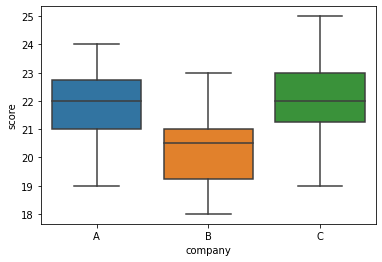

In [7]:
sns.boxplot(data.company, data.score);

In [8]:
# compute overall mean
overall_mean = data['score'].mean()
print('overall_mean =', np.round(overall_mean, 3))

overall_mean = 21.4


In [9]:
# compute Sum of Squares Total
data['overall_mean'] = overall_mean
ss_total = sum((data['score'] - data['overall_mean'])**2)
print('SS_total =', np.round(ss_total, 3))

SS_total = 89.2


In [10]:
# compute group means
group_means = data.groupby('company').agg({'score': 'mean'})
group_means = group_means.rename(columns = {'score': 'group_mean'})
group_means

,group_mean
company,
A,21.8
B,20.3
C,22.1


In [11]:
# add group means and overall mean to the original data frame
data = data.merge(group_means, left_on = 'company', right_index = True)

In [12]:
data.head()

,company,score,overall_mean,group_mean
0,A,22,21.4,21.8
1,A,22,21.4,21.8
2,A,19,21.4,21.8
3,A,21,21.4,21.8
4,A,23,21.4,21.8


In [13]:
# compute Sum of Squares Residual
ss_w = sum((data['score'] - data['group_mean'])**2)
print('SS_w =', np.round(ss_w, 3))

SS_w = 70.6


In [14]:
# compute Sum of Squares Model
ss_b = sum((data['overall_mean'] - data['group_mean'])**2)
print('SS_b =', np.round(ss_b, 3))

SS_b = 18.6


In [15]:
# compute Mean Square Residual
n_groups = len(set(data['company']))
n_obs = data.shape[0]
df_w = n_obs - n_groups
ms_w = ss_w / df_w
print('Внутригрупповая (остаточная) дисперсия\ndf = N - k =', df_w)
print('MS_w =', np.round(ms_w, 3))

Внутригрупповая (остаточная) дисперсия
df = N - k = 27
MS_w = 2.615


In [16]:
# compute Mean Square Explained
df_b = n_groups - 1
ms_b = ss_b / df_b

print('Межгрупповая (факторная) дисперсия\ndf = k - 1 =', df_b)
print('MS_b =', np.round(ms_b, 3))

Межгрупповая (факторная) дисперсия
df = k - 1 = 2
MS_b = 9.3


Таблица значений F-критерия Фишера при уровне значимости $\alpha = 0.05$
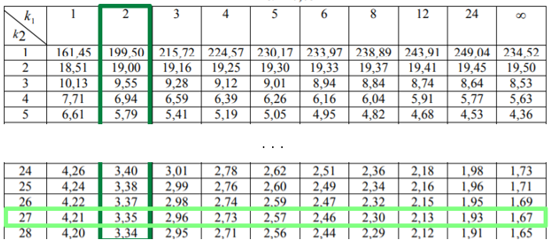

In [20]:
# compute F-Value
f = ms_b / ms_w
f_critical = 3.35
print('F-критерий Фишера\nF = MS_b / MS_w =', np.round(f, 3))
print('F критическое =', f_critical)
print('F > F крит' if f > f_critical else 'F < F крит')
print('Делаем вывод о наличии статистически значимых отличий между \nгруппами' if f > f_critical 
      else 'Делаем вывод об отсутствии статистически значимых отличий между группами ',
      'при заданном уровне значимости alpha = 0.05')

F-критерий Фишера
F = MS_b / MS_w = 3.557
F критическое = 3.35
F > F крит
Делаем вывод о наличии статистически значимых отличий между 
группами при заданном уровне значимости alpha = 0.05


### Отвергаем нулевую гипотезу H0 $\mu1 = \mu2 = \mu3$

In [18]:
# compute p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_b, df_w)
p_value

0.0425537590454339